# Support Vector Regression (SVR)

In [2]:
# This training will talk about linear SVR.
# In SLR, we search the minimum value (ordinary least squares) from data to prediction
# In SVR, same as SLR, but instead of line, we will make tube epsilon insensitive tube, that have thickness (width) called epsilon
# the width is represent margin of error that the model allowed to had.
# SLR care about all point that not placed in SLR line, but SVR only care all point that not placed inside the tube.

# SVR also support non linear regression to, depend on what kind of kernel 

# even we have same dataset as polynomial training, in this chapter we must do feature scaling.
# because SVR don't have explicit equation, so it don't have coefficient like polynomial
# then, we must make implisit feature scaling to each dependant variable

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1:].values

In [5]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
# this step will cover how to do feature scaling for data preprocess & how to reverse the preprocessed feature scaling
# all dataset will be used, because we want full accuracy based on data.
# in training 1, we only scale the independant variable because the dependant variable was take value 0/1
# in this training, we have different situation, where feature is range from 1-10, and dependant variable is salary data (45000 - 1000000)
# we must do feature scaling on both variable, using standardisation
# standardisation used separately because independant & dependant data have different scale, so if we use same object of fitted x to transform the Y, Y will use mean of x

from sklearn.preprocessing import StandardScaler

# option 1, we can concatenate x and y, do standardisation, and split it again
sc = StandardScaler()
combine = np.concatenate((x,y),axis=1)
combine_scl = sc.fit_transform(combine)
comb_x = combine_scl[:,:-1]
comb_y = combine_scl[:,-1:]

# option 2, use 2 standardscaler object to fit 
scx = StandardScaler()
x_scl = scx.fit_transform(x)

scy = StandardScaler()
y_scl = scy.fit_transform(y)

# but better use option 2, because after we standardize each feature, if we want to predict some value, we must do transform to x val, and do reverse transform to y result

In [8]:
print(combine)

[[      1   45000]
 [      2   50000]
 [      3   60000]
 [      4   80000]
 [      5  110000]
 [      6  150000]
 [      7  200000]
 [      8  300000]
 [      9  500000]
 [     10 1000000]]


In [9]:
print(combine_scl)

[[-1.5666989  -0.72004253]
 [-1.21854359 -0.70243757]
 [-0.87038828 -0.66722767]
 [-0.52223297 -0.59680786]
 [-0.17407766 -0.49117815]
 [ 0.17407766 -0.35033854]
 [ 0.52223297 -0.17428902]
 [ 0.87038828  0.17781001]
 [ 1.21854359  0.88200808]
 [ 1.5666989   2.64250325]]


In [10]:
print(x_scl)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y_scl)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [12]:
# import module SVR from scikit learn
from sklearn.svm import SVR

# create object svr
# in svr, we must input parameter, 
# must define : kernel (what kind of SVR)
# trainer recommend use RBF kernel each time we do experimental procedure use SVR
sv = SVR(kernel = 'rbf')

# train model use dataset
sv.fit(x_scl,y_scl)

SVR()

## Predicting a new result

In [19]:
# to reverse scaled value, use inverse transform on standardisation object that already fitted.
reverse_y = scy.inverse_transform(y_scl)

# transform first x to standardize scale
x_pred = scx.transform([[6.5]])
# use scaled x
y_pred = sv.predict(x_pred)

# inverse result from y
y_res = scy.inverse_transform(y_pred)

In [20]:
print(reverse_y)

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [21]:
print(y_res)

[170370.0204065]


## Visualising the SVR results

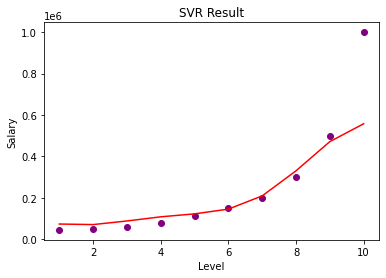

In [23]:
plt.scatter(x,y,color="purple")
plt.plot(x,scy.inverse_transform(sv.predict(scx.transform(x))),color="red")
plt.title("SVR Result")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

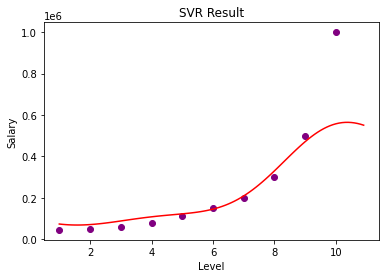

In [30]:
x_smooth = np.arange(min(x),max(x)+1,0.1)
x_smooth = x_smooth.reshape(len(x_smooth),1)
plt.scatter(x,y,color="purple")
plt.plot(x_smooth,scy.inverse_transform(sv.predict(scx.transform(x_smooth))),color="red")
plt.title("SVR Result")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [ ]:
# after looking at the result, we know that SVR not so accurate to predict salary dataset
# and polynomial have better accuracy